In [1]:
# Image Classification Using Tensorflow

In [21]:
import tensorflow as tf 
from tensorflow import keras 
from keras import layers 
  
import numpy as np 
import matplotlib.pyplot as plt 
import time
import warnings 
warnings.filterwarnings('ignore')

#tf.config.set_visible_devices([], 'GPU')  # Hides all GPUs
#print("GPU Disabled. Running on CPU.")
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPUs Available:", gpus)
else:
   print("No GPU found.")

GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [22]:
cifar100 = tf.keras.datasets.cifar100 

  
# Distribute it to train and test set 
(x_train, y_train), (x_val, y_val) = cifar100.load_data() 
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape) 
num_samples = 10_000
indices = np.random.choice(x_train.shape[0], num_samples, replace=False)
x_train, y_train = x_train[indices], y_train[indices]

print(f"Selected training dataset shape: {x_train.shape}, Labels shape: {y_train.shape}")


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
Selected training dataset shape: (10000, 32, 32, 3), Labels shape: (10000, 1)


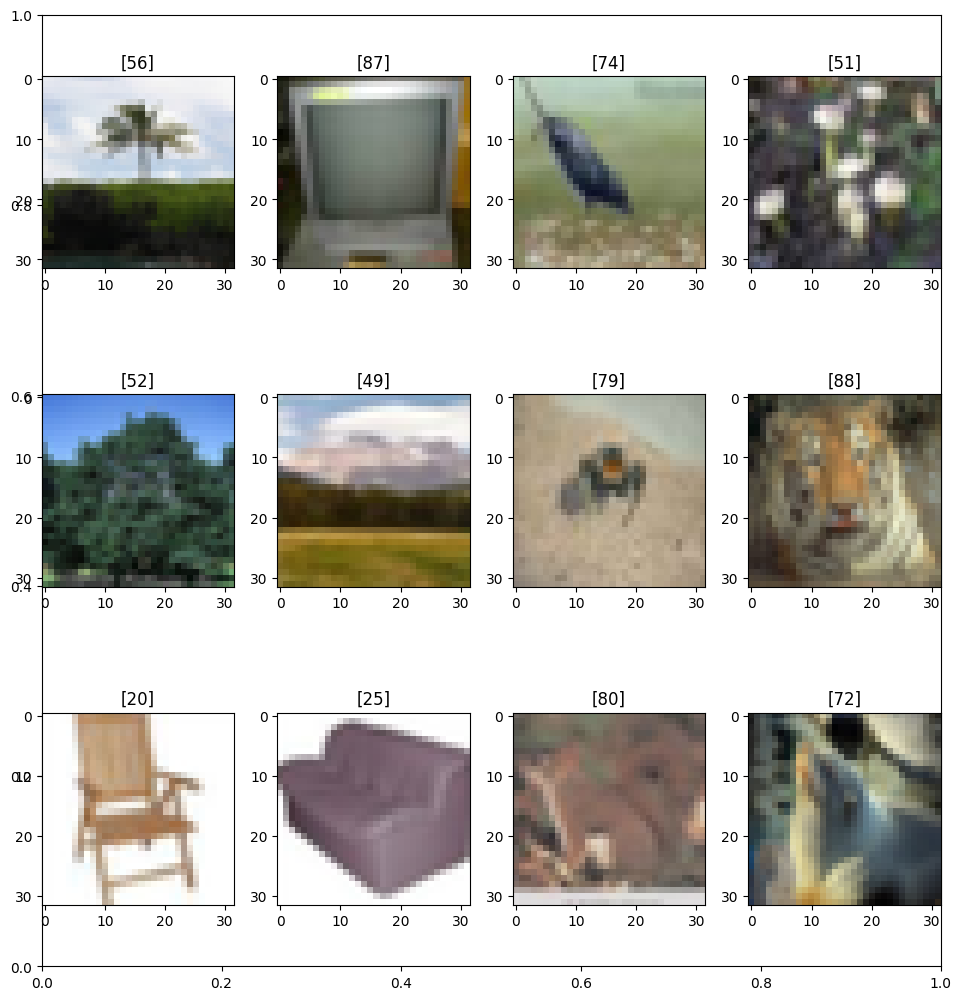

In [23]:
def show_samples(data, labels): 
    plt.subplots(figsize=(10, 10)) 
    for i in range(12): 
        plt.subplot(3, 4, i+1) 
        k = np.random.randint(0, data.shape[0]) 
        plt.title(labels[k]) 
        plt.imshow(data[k]) 
    plt.tight_layout() 
    plt.show() 
  
  
show_samples(x_train, y_train) 

In [24]:
#Data Splitting

In [25]:
y_train = tf.one_hot(y_train, 
                     depth=y_train.max() + 1, 
                     dtype=tf.float64) 
y_val = tf.one_hot(y_val, 
                   depth=y_val.max() + 1, 
                   dtype=tf.float64) 
  
y_train = tf.squeeze(y_train) 
y_val = tf.squeeze(y_val) 

In [26]:
model = tf.keras.models.Sequential([ 
	layers.Conv2D(16, (3, 3), activation='relu', 
				input_shape=(32, 32, 3), padding='same'), 
	layers.Conv2D(32, (3, 3), 
				activation='relu', 
				padding='same'), 
	layers.Conv2D(64, (3, 3), 
				activation='relu', 
				padding='same'), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(128, (3, 3), 
				activation='relu', 
				padding='same'), 


	layers.Flatten(), 
	layers.Dense(256, activation='relu'), 
	layers.BatchNormalization(), 
	layers.Dense(256, activation='relu'), 
	layers.Dropout(0.3), 
	layers.BatchNormalization(), 
	layers.Dense(100, activation='softmax') 
]) 

model.compile( 
	loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), 
	optimizer='adam', 
	metrics=['AUC', 'accuracy'] 
) 


In [27]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,579,844 (32.73 MB)

 Trainable params: 8,578,820 (32.73 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [28]:
epoch_time_start = int(time.time())
hist = model.fit(x_train, y_train, 
				epochs=2, 
				batch_size=64, 
				verbose=1, 
				validation_data=(x_val, y_val)) 
epoch_time_end = int(time.time())
print(" The Model takes " + str(epoch_time_end - epoch_time_start) + " secs")

Epoch 1/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 117s 720ms/step - AUC: 0.6034 - accuracy: 0.0282 - loss: 4.7696 - val_AUC: 0.7240 - val_accuracy: 0.0717 - val_loss: 4.3149
Epoch 2/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 111s 706ms/step - AUC: 0.7696 - accuracy: 0.0902 - loss: 4.0312 - val_AUC: 0.7464 - val_accuracy: 0.0854 - val_loss: 4.1212
 The Model takes 228 secs
